<a href="https://colab.research.google.com/github/Mohammedkaif2004/LinearRegression_-_RandomForest/blob/main/calasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 In this project, we are going to build a classification model that can recommend preferred places to individuals based on their choices.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

Load the data

In [32]:
data=pd.read_csv('/content/mountains_vs_beaches_preferences.csv')

hear in preference 0 represents=beach
and 1 reprentes=montains

In [33]:
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


getting statistic of the data

In [34]:
data.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


checking whether there is any missing values

In [35]:
data.isna().sum()

,0
Age,0
Gender,0
Income,0
Education_Level,0
Travel_Frequency,0
Preferred_Activities,0
Vacation_Budget,0
Location,0
Proximity_to_Mountains,0
Proximity_to_Beaches,0


Data processing

In [36]:
data.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
5,25,male,110588,doctorate,3,sunbathing,2895,urban,6,47,fall,0,1,0
6,38,male,22245,bachelor,1,swimming,4994,rural,157,225,fall,0,1,0
7,56,non-binary,109411,bachelor,8,sunbathing,3656,urban,210,166,winter,1,0,0
8,36,male,22531,master,6,swimming,2408,suburban,218,263,summer,1,1,0
9,40,non-binary,90840,high school,1,swimming,4044,rural,271,15,summer,1,1,0


know conveting the assential colums in inter values

In [37]:
data['Favorite_Season'].unique()

array(['summer', 'fall', 'winter', 'spring'], dtype=object)

In [38]:
data['Preferred_Activities'].unique()

array(['skiing', 'swimming', 'hiking', 'sunbathing'], dtype=object)

In [21]:
data['Education_Level'].unique()

array(['bachelor', 'master', 'high school', 'doctorate'], dtype=object)

fuction for changing the catogorail data into the numerical data

In [39]:
def education_level(text):
  if text=='high school':
    return 0
  elif text=='bachelor':
    return 1
  elif text=='master':
    return 2
  elif text=='doctorate':
    return 3
  else:
    return 4

def gender(text):
  if text=='male':
    return 0
  else:
    return 1



def Preferred_Activities(text):
  if text=='hiking':
    return 0
  elif text=='sunbathing':
    return 1
  elif text=='skiing':
    return 2
  elif text=='Swimming':
    return 3
  else:
    return 4

def Favorite_Season(text):
  if text=='spring':
    return 0
  elif text=='summer':
    return 1
  elif text=='fall':
    return 2
  else:
    return 3



In [40]:
data['Education_Level']=data['Education_Level'].apply(education_level)
data['Gender']=data['Gender'].apply(gender)
data['Preferred_Activities']=data['Preferred_Activities'].apply(Preferred_Activities)
data['Favorite_Season']=data['Favorite_Season'].apply(Favorite_Season)
data.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,0,71477,1,9,2,2477,urban,175,267,1,0,1,1
1,69,0,88740,2,1,4,4777,suburban,228,190,2,0,1,0
2,46,1,46562,2,0,2,1469,urban,71,280,3,0,0,1
3,32,1,99044,0,6,0,1482,rural,31,255,1,1,0,1
4,60,1,106583,0,5,1,516,suburban,23,151,3,1,1,0
5,25,0,110588,3,3,1,2895,urban,6,47,2,0,1,0
6,38,0,22245,1,1,4,4994,rural,157,225,2,0,1,0
7,56,1,109411,1,8,1,3656,urban,210,166,3,1,0,0
8,36,0,22531,2,6,4,2408,suburban,218,263,1,1,1,0
9,40,1,90840,0,1,4,4044,rural,271,15,1,1,1,0


In [44]:
data = pd.get_dummies(data, drop_first=True)
data.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Location_suburban,Location_urban
0,56,0,71477,1,9,2,2477,175,267,1,0,1,1,False,True
1,69,0,88740,2,1,4,4777,228,190,2,0,1,0,True,False
2,46,1,46562,2,0,2,1469,71,280,3,0,0,1,False,True
3,32,1,99044,0,6,0,1482,31,255,1,1,0,1,False,False
4,60,1,106583,0,5,1,516,23,151,3,1,1,0,True,False
5,25,0,110588,3,3,1,2895,6,47,2,0,1,0,False,True
6,38,0,22245,1,1,4,4994,157,225,2,0,1,0,False,False
7,56,1,109411,1,8,1,3656,210,166,3,1,0,0,False,True
8,36,0,22531,2,6,4,2408,218,263,1,1,1,0,True,False
9,40,1,90840,0,1,4,4044,271,15,1,1,1,0,False,False


Descibing Feutures and Target

In [45]:
X=data.drop('Preference',axis=1)
y=data['Preference']


Spliting the feutures


In [46]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Feuture Scaling

In [47]:
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [48]:
model=RandomForestClassifier(n_estimators=100,random_state=2)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

Making a prediction

In [49]:
Prediction=model.predict(X_test)

Confusion matrix

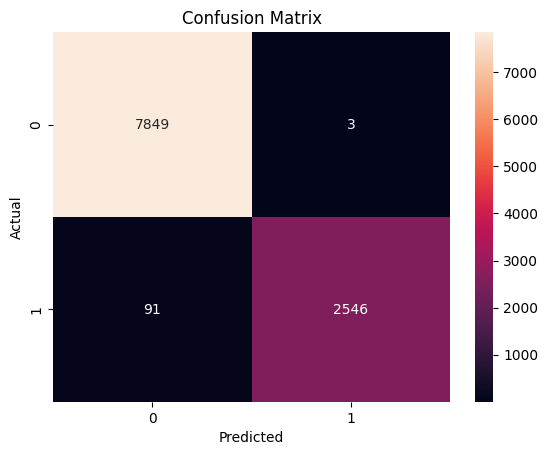

In [50]:
cm = confusion_matrix(y_test, Prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [51]:
accuracy_score(y_test,Prediction)

0.991038230527219

Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200,350 , 500],
    'max_depth': [None, 10, 20, 30, 50 , 100],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 500}


In [53]:
best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7852
           1       1.00      0.97      0.98      2637

    accuracy                           0.99     10489
   macro avg       0.99      0.98      0.99     10489
weighted avg       0.99      0.99      0.99     10489

